## Math 156 Final Project
### Code Draft 1

<div class="alert alert-block alert-success">

Goal for the project: 
1. Decide which parts of our data set to use
2. Code our own linear regression to find a function
3. Try to optimize the function

<div class="alert alert-block alert-success">
Ideas
    
1. Use one year for testing for another year for training 

In [20]:
# Import the libraries we will be using 
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [38]:
# Filter the data 
df = pd.read_excel('Data.xls')
columns_to_keep = ['Country name', 'year', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
df_filtered = df_data_panel.filter(columns_to_keep)

In [35]:
# Print head 
df_filtered.head(5)

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195
1,Afghanistan,2009,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092
2,Afghanistan,2010,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324
3,Afghanistan,2011,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175
4,Afghanistan,2012,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919


In [39]:
# Print tail
df_filtered.tail(5)

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2084,Zimbabwe,2017,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051
2085,Zimbabwe,2018,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726
2086,Zimbabwe,2019,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354
2087,Zimbabwe,2020,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736
2088,Zimbabwe,2021,8.153248,0.685151,54.049999,0.667636,-0.109439,0.756945,0.609917,0.241682


<div class="alert alert-block alert-success">
The code belows gives all the information for the year 2020
    
This could be our training data set

In [41]:
df_filtered_2020 = df_filtered[df_filtered.year == 2020]
df_filtered_2020.head(5)

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Albania,2020,9.487400,0.710115,69.125000,0.753671,0.006331,0.891359,0.563486,0.265066
35,Algeria,2020,9.281301,0.867649,66.500000,0.573891,-0.118536,0.724264,0.524169,0.310630
55,Argentina,2020,9.887899,0.897104,67.150002,0.823392,-0.126743,0.815780,0.679317,0.342497
85,Australia,2020,10.793239,0.936517,70.974998,0.905283,0.205083,0.491095,0.725689,0.205078
99,Austria,2020,10.856220,0.924831,71.025002,0.911910,0.008044,0.463830,0.716352,0.206500


<div class="alert alert-block alert-success">
The code belows gives all the information for the year 2021
    
This could be our testing data set
    
SOMETHING TO WATCH OUT FOR: Missing countries. We can filter these out 

In [43]:
df_filtered_2021 = df_filtered[df_filtered.year == 2021]
df_filtered_2021.head(5)

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
12,Afghanistan,2021,NaN,0.454175,54.549999,0.394306,NaN,0.946299,0.178886,0.606713
26,Albania,2021,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654
36,Algeria,2021,9.303516,0.840710,66.599998,0.558487,-0.111191,0.711900,0.498022,0.257779
56,Argentina,2021,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132
71,Armenia,2021,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540


<div class="alert alert-block alert-success">
Data exploration using our training data set

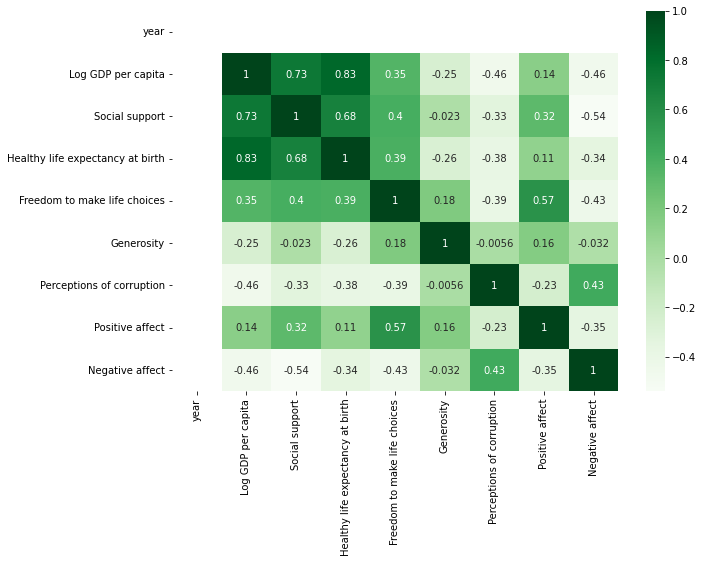

In [44]:
# Create the correlation heatmap 

plt.figure(figsize=(10, 7))

dataplot = sb.heatmap(df_filtered_2020.corr(), cmap="Greens", annot=True)

plt.show()

In [45]:
# Analyzing 'Social support' and distribution

print("Social support")
print("mean:", df_filtered_2020["Social support"].mean())
print("median:",df_filtered_2020["Social support"].median())
print("midpoint:",(df_filtered_2020["Social support"].max() + df_filtered_2020["Social support"].min()) / 2)
print("standard deviation:",df_filtered_2020["Social support"].std())
print()

Social support
mean: 0.8229818739767732
median: 0.8451225161552429
midpoint: 0.7449610829353333
standard deviation: 0.11187589687104349



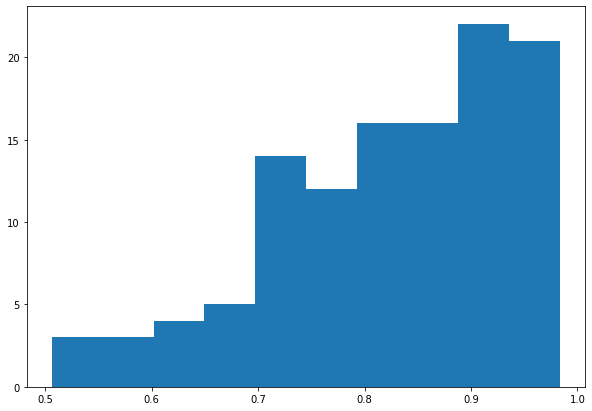

In [49]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_filtered_2020["Social support"])
 
plt.show()

### Work distribution idea: 

- Clean the data (not hard, we just need to remove some missing years)
- Possibly bring in one or two other data sets 

- Decide on uni or multivariate regression (multivariate is probably better)
- Type up our own mean squares algorithm (which we can double check using the function)

[Look at the feedback form to add more things to do]